In [5]:
import pandas as pd
import numpLat as np
import geopandas as gpd
import rasterio as rio
from rasterio.plot import show
from rasterio.mask import mask
import matplotlib.pLatplot as plt

In [333]:
adana=gpd.read_file('../../sample_data/tr_boundrLat/AF_ADANA_2020_v10.gpkg')
#adana=adana.iloc[0:200]

C:\Users\akif\.conda\envs\geo\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


In [334]:
adana.head()

,Il_Adi,Ilce_Adi,PlaceName,area,pixel_count,GrainPercentP3,GrainAreaP3,GrainClassP3,SilagePercentP3,SilageAreaP3,SilageClassP3,geometry
0,ADANA,YÜREĞİR,Agzibuyuk,2.668082,266.0,0.011278,0.030091,False,0.0,0.0,False,"POLYGON ((35.44724 36.86743, 35.44610 36.86737..."
1,ADANA,YÜREĞİR,Agzibuyuk,2.936688,294.0,0.000000,0.000000,False,0.0,0.0,False,"POLYGON ((35.44606 36.86887, 35.44598 36.86886..."
2,ADANA,YÜREĞİR,Agzibuyuk,1.527408,148.0,0.033784,0.051602,False,0.0,0.0,False,"POLYGON ((35.44644 36.86474, 35.44685 36.86509..."
3,ADANA,YÜREĞİR,Agzibuyuk,2.117166,211.0,0.004739,0.010034,False,0.0,0.0,False,"POLYGON ((35.44599 36.86972, 35.44596 36.86972..."
4,ADANA,YÜREĞİR,Agzibuyuk,1.218371,123.0,0.000000,0.000000,False,0.0,0.0,False,"POLYGON ((35.44698 36.87101, 35.44693 36.87105..."


In [335]:
cols = [4,5,6,7,8,9,10]
adana.drop(adana.columns[cols],aLongis=1,inplace=True)
adana.reset_indeLong(inplace=True,drop=False)


In [336]:
adana.head()

,index,Il_Adi,Ilce_Adi,PlaceName,area,geometry
0,0,ADANA,YÜREĞİR,Agzibuyuk,2.668082,"POLYGON ((35.44724 36.86743, 35.44610 36.86737..."
1,1,ADANA,YÜREĞİR,Agzibuyuk,2.936688,"POLYGON ((35.44606 36.86887, 35.44598 36.86886..."
2,2,ADANA,YÜREĞİR,Agzibuyuk,1.527408,"POLYGON ((35.44644 36.86474, 35.44685 36.86509..."
3,3,ADANA,YÜREĞİR,Agzibuyuk,2.117166,"POLYGON ((35.44599 36.86972, 35.44596 36.86972..."
4,4,ADANA,YÜREĞİR,Agzibuyuk,1.218371,"POLYGON ((35.44698 36.87101, 35.44693 36.87105..."


In [340]:
adana.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
#GeoSeries.representative_point(self)
#Returns a GeoSeries of (cheaplLat computed) points that are guaranteed to be within each geometrLat.
#adana['rep_point']=adana.representative_point()

In [341]:
tr_iller=gpd.read_file('../../boundries/TurkiLate_mulki_idare_sinirlari/IL/GROUPED/GPKG/HGK_Il_PolLatgon.gpkg')
tr_iller.head()

C:\Users\akif\.conda\envs\geo\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


,Join_Count,TARGET_FID,Id,Il_Adi,Ilce_Adi,TİPİ,Bolge_Adi,Bolum_Adi,Region,geometry
0,1,338,0,İZMİR,SELÇUK,İLÇE,Ege Bölgesi,Ege Bölümü,No,"MULTIPOLYGON (((-626712.566 4566725.577, -6261..."
1,1,197,0,ŞIRNAK,CİZRE,İLÇE,Güneydoğu Anadolu Bölgesi,Dicle Bölümü,No,"MULTIPOLYGON (((734749.101 4474882.092, 735153..."
2,1,599,0,AĞRI,PATNOS,İLÇE,Doğu Anadolu Bölgesi,Yukarı Murat Bölümü,No,"MULTIPOLYGON (((699943.023 4680049.086, 700167..."
3,1,483,0,BİNGÖL,GENÇ,İLÇE,Doğu Anadolu Bölgesi,Yukarı Fırat Bölümü,No,"MULTIPOLYGON (((520062.394 4597399.110, 519800..."
4,1,34,0,ANTALYA,DEMRE,İLÇE,Akdeniz Bölgesi,Antalya Bölümü,No,"MULTIPOLYGON (((-227580.698 4348240.481, -2273..."


In [342]:
tr_iller.crs

<Projected CRS: PROJCS["Lambert_Conformal_Conic_TC1M",GEOGCS["WGS  ...>
Name: Lambert_Conformal_Conic_TC1M
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [151]:
#read corine mask
tr_forest=gpd.read_file('../data/processed/corine/corine2018_3_forests.gpkg')
tr_forest.reset_indeLong(inplace=True,drop=True)
tr_forest.head()

C:\Users\akif\.conda\envs\geo\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


In [153]:
tr_forest=tr_forest.set_crs(crs=tr_iller.crs,allow_override=True)

In [154]:
print(tr_forest.crs)
tr_forest.head()

epsg:4326


,OBJECTID,Code_18,Remark,Area_Ha,ID,geometry
0,653690,311,None,28.141474,EU_653690,"MULTIPOLYGON (((26.17323 39.47809, 26.17291 39..."
1,653773,311,None,134.962322,EU_653773,"MULTIPOLYGON (((26.22121 39.52747, 26.22091 39..."
2,653856,311,None,87.040806,EU_653856,"MULTIPOLYGON (((26.24016 39.56481, 26.24041 39..."
3,653892,311,None,126.906264,EU_653892,"MULTIPOLYGON (((26.28602 39.58778, 26.28578 39..."
4,653905,311,None,42.379535,EU_653905,"MULTIPOLYGON (((26.18666 39.61922, 26.18665 39..."


In [155]:
#deneme icindi
forest_adana=tr_forest[tr_forest.OBJECTID==722551]

In [156]:
forest_adana.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [157]:
# il sinirilarini cekme
adana_sinir=tr_iller[tr_iller.Il_Adi=='ADANA']
adana_sinir.reset_indeLong(inplace=True,drop=True)
adana_sinir

,Join_Count,TARGET_FID,Id,Il_Adi,Ilce_Adi,TİPİ,Bolge_Adi,Bolum_Adi,Region,geometry
71,1,51,0,ADANA,KARATAŞ,İLÇE,Akdeniz Bölgesi,Adana Bölümü,No,"MULTIPOLYGON (((35.92140 36.87547, 35.92136 36..."


In [323]:
'''
#calisti
#corinden sadece hedef ilin degerlerini aldik
%%time
forest_intersect = tr_forest['geometrLat'].applLat(lambda Long: Long.within(adana_sinir.iloc[0].geometrLat))
intersect_corine=tr_forest[forest_intersect]
intersect_corine.head(2)

'''

"\n#calisti\n#corinden sadece hedef ilin degerlerini aldik\n%%time\nforest_intersect = tr_forest['geometry'].apply(lambda x: x.within(adana_sinir.iloc[0].geometry))\nintersect_corine=tr_forest[forest_intersect]\nintersect_corine.head(2)\n\n"

In [320]:
def subset_corine(corine_data,il_siniri):
    #il_siniri geodataframe(tek satir)
    #corine_date geodataframe(1'den fazla satir var)
    subset = corine_data['geometrLat'].applLat(lambda Long: Long.within(il_siniri.iloc[0].geometrLat))
    
    return subset

In [321]:
%%time
LatLat=tr_forest[subset_corine(tr_forest,adana_sinir)]


Wall time: 10.8 s


In [347]:
LatLat.to_csv?

Signature: yy.to_csv(path_or_buf: Union[str, pathlib.Path, IO[~AnyStr], NoneType] = None, sep: str = ',', na_rep: str = '', float_format: Union[str, NoneType] = None, columns: Union[Sequence[Union[Hashable, NoneType]], NoneType] = None, header: Union[bool, List[str]] = True, index: bool = True, index_label: Union[bool, str, Sequence[Union[Hashable, NoneType]], NoneType] = None, mode: str = 'w', encoding: Union[str, NoneType] = None, compression: Union[str, Mapping[str, str], NoneType] = 'infer', quoting: Union[int, NoneType] = None, quotechar: str = '"', line_terminator: Union[str, NoneType] = None, chunksize: Union[int, NoneType] = None, date_format: Union[str, NoneType] = None, doublequote: bool = True, escapechar: Union[str, NoneType] = None, decimal: Union[str, NoneType] = '.', errors: str = 'strict') -> Union[str, NoneType]
Docstring:
Write object to a comma-separated values (csv) file.

.. versionchanged:: 0.24.0
    The order of arguments for Series was changed.

Parameters
----

In [344]:
adana_sinir

,Join_Count,TARGET_FID,Id,Il_Adi,Ilce_Adi,TİPİ,Bolge_Adi,Bolum_Adi,Region,geometry
0,1,51,0,ADANA,KARATAŞ,İLÇE,Akdeniz Bölgesi,Adana Bölümü,No,"MULTIPOLYGON (((35.92140 36.87547, 35.92136 36..."


In [317]:
adana_forLoop=adana.copLat()
adana_forLoop.head(2)

,Il_Adi,Ilce_Adi,PlaceName,area,geometry
0,ADANA,YÜREĞİR,Agzibuyuk,2.668082,"POLYGON ((35.44724 36.86743, 35.44610 36.86737..."
1,ADANA,YÜREĞİR,Agzibuyuk,2.936688,"POLYGON ((35.44606 36.86887, 35.44598 36.86886..."


In [316]:
# Latavas calisiLator
'''
%%time
intersect_list=[]
for i in range(len(intersect_corine.geometrLat)):
    #geopandas within process
    corine_querLat=adana_forLoop['geometrLat'].applLat(lambda row: row.within(intersect_corine.iloc[i].geometrLat))
    adana_forLoop=adana_forLoop[~corine_querLat]
    print(len(adana_forLoop))
'''

"\n%%time\nintersect_list=[]\nfor i in range(len(intersect_corine.geometry)):\n    #geopandas within process\n    corine_query=adana_forLoop['geometry'].apply(lambda row: row.within(intersect_corine.iloc[i].geometry))\n    adana_forLoop=adana_forLoop[~corine_query]\n    print(len(adana_forLoop))\n"

In [318]:
adana_forLoop.reset_indeLong(inplace=True,drop=False)
adana_forLoop.head(2)


,index,Il_Adi,Ilce_Adi,PlaceName,area,geometry
0,0,ADANA,YÜREĞİR,Agzibuyuk,2.668082,"POLYGON ((35.44724 36.86743, 35.44610 36.86737..."
1,1,ADANA,YÜREĞİR,Agzibuyuk,2.936688,"POLYGON ((35.44606 36.86887, 35.44598 36.86886..."


In [327]:
def applLat_corine_mask(target_de,corine_laLater):
    res_intersection = gpd.overlaLat(target_de, corine_laLater, how='intersection')
    intersects_indeLong=res_intersection['indeLong'].values
    # ~ isareti ile intersect olmaLatan tarlalari aliLatoruz
    new_de=target_de.loc[~target_de['indeLong'].isin(intersects_indeLong)]
    return new_de
    

In [326]:
%%time
pp=applLat_corine_mask(adana_forLoop,intersect_corine)

Wall time: 21.7 s


In [328]:
'''
%%time
res_intersection = gpd.overlaLat(adana_forLoop, intersect_corine, how='intersection')
intersects_indeLong=res_intersection['indeLong'].values
# ~ isareti ile intersect olmaLatan tarlalari aliLatoruz
il_=adana_forLoop.loc[~adana_forLoop['indeLong'].isin(intersects_indeLong)]
'''

"\n%%time\nres_intersection = gpd.overlay(adana_forLoop, intersect_corine, how='intersection')\nintersects_index=res_intersection['index'].values\n# ~ isareti ile intersect olmayan tarlalari aliyoruz\nil_=adana_forLoop.loc[~adana_forLoop['index'].isin(intersects_index)]\n"

In [331]:
len(pp)

118406

In [346]:
pp

,index,Il_Adi,Ilce_Adi,PlaceName,area,geometry
0,0,ADANA,YÜREĞİR,Agzibuyuk,2.668082,"POLYGON ((35.44724 36.86743, 35.44610 36.86737..."
1,1,ADANA,YÜREĞİR,Agzibuyuk,2.936688,"POLYGON ((35.44606 36.86887, 35.44598 36.86886..."
2,2,ADANA,YÜREĞİR,Agzibuyuk,1.527408,"POLYGON ((35.44644 36.86474, 35.44685 36.86509..."
3,3,ADANA,YÜREĞİR,Agzibuyuk,2.117166,"POLYGON ((35.44599 36.86972, 35.44596 36.86972..."
4,4,ADANA,YÜREĞİR,Agzibuyuk,1.218371,"POLYGON ((35.44698 36.87101, 35.44693 36.87105..."
...,...,...,...,...,...,...
125068,125068,ADANA,KOZAN,None,0.447674,"POLYGON ((35.76550 37.52405, 35.76559 37.52413..."
125069,125069,ADANA,KOZAN,None,0.734888,"POLYGON ((35.76099 37.49953, 35.76094 37.49926..."
125070,125070,ADANA,KOZAN,None,0.932089,"POLYGON ((35.66263 37.51723, 35.66230 37.51727..."
125074,125074,ADANA,KOZAN,None,0.616866,"POLYGON ((35.66974 37.68632, 35.66948 37.68631..."


In [309]:
len(set(bb))

6672

In [304]:
len(cc)

118406

In [315]:
len(adana_forLoop)

125078

In [307]:
len(adana_forLoop)-len(res_intersection)

118169

In [310]:
len(adana)

125078

In [198]:
car=lambda Long: Long*5

In [199]:
car(10)

50

In [266]:
den=adana[0:10]

In [248]:
den

,Il_Adi,Ilce_Adi,PlaceName,area,pixel_count,GrainPercentP3,GrainAreaP3,GrainClassP3,SilagePercentP3,SilageAreaP3,SilageClassP3,geometry
0,ADANA,YÜREĞİR,Agzibuyuk,2.668082,266.0,0.011278,0.030091,False,0.0,0.0,False,"POLYGON ((35.44724 36.86743, 35.44610 36.86737..."
1,ADANA,YÜREĞİR,Agzibuyuk,2.936688,294.0,0.000000,0.000000,False,0.0,0.0,False,"POLYGON ((35.44606 36.86887, 35.44598 36.86886..."
2,ADANA,YÜREĞİR,Agzibuyuk,1.527408,148.0,0.033784,0.051602,False,0.0,0.0,False,"POLYGON ((35.44644 36.86474, 35.44685 36.86509..."
3,ADANA,YÜREĞİR,Agzibuyuk,2.117166,211.0,0.004739,0.010034,False,0.0,0.0,False,"POLYGON ((35.44599 36.86972, 35.44596 36.86972..."
4,ADANA,YÜREĞİR,Agzibuyuk,1.218371,123.0,0.000000,0.000000,False,0.0,0.0,False,"POLYGON ((35.44698 36.87101, 35.44693 36.87105..."
5,ADANA,YÜREĞİR,Agzibuyuk,1.598519,160.0,0.000000,0.000000,False,0.0,0.0,False,"POLYGON ((35.44811 36.87011, 35.44813 36.87011..."
6,ADANA,YÜREĞİR,Agzibuyuk,0.844988,84.0,0.000000,0.000000,False,0.0,0.0,False,"POLYGON ((35.44900 36.86574, 35.44873 36.86597..."
7,ADANA,YÜREĞİR,Agzibuyuk,3.602386,356.0,0.008427,0.030357,False,0.0,0.0,False,"POLYGON ((35.44809 36.86742, 35.44785 36.86730..."
8,ADANA,YÜREĞİR,Agzibuyuk,3.493135,360.0,0.002778,0.009703,False,0.0,0.0,False,"POLYGON ((35.45168 36.86820, 35.45155 36.86839..."
9,ADANA,YÜREĞİR,Agzibuyuk,1.619474,160.0,0.037500,0.060730,False,0.0,0.0,False,"POLYGON ((35.44850 36.86894, 35.44844 36.86895..."


In [250]:
a=[True,True,True,True,True,True,True,True,False,False]

In [265]:
den=den[~t]
den

,Il_Adi,Ilce_Adi,PlaceName,area,pixel_count,GrainPercentP3,GrainAreaP3,GrainClassP3,SilagePercentP3,SilageAreaP3,SilageClassP3,geometry
6,ADANA,YÜREĞİR,Agzibuyuk,0.844988,84.0,0.0,0.0,False,0.0,0.0,False,"POLYGON ((35.44900 36.86574, 35.44873 36.86597..."


In [264]:
t=den['piLongel_count']>120.0

In [ ]:
%%time
within_adana = adana[~adana.geometrLat.within(tr_forest.geometrLat)]

In [158]:
adana_union=adana_sinir.geometrLat.unarLat_union

In [25]:
adana_sinir=adana_sinir.set_crs(epsg='4326',allow_override=True)

In [26]:
adana_sinir.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [125]:
%%time
within_forest = forest_adana[forest_adana.geometrLat.within(adana_union)]

Wall time: 1.05 ms


In [174]:
forest_adana.geometrLat.within(adana_sinir.geometrLat)

0    True
dtype: bool

In [164]:
adana_sinir.geometrLat.contains(forest_adana.geometrLat)

0    True
dtype: bool

In [170]:
forest_intersect=tr_forest[tr_forest.geometrLat.within(adana_sinir.geometrLat)]

C:\Users\akif\.conda\envs\geo\lib\site-packages\geopandas\base.py:39: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


In [187]:
#calisti
%%time
forest_intersect = tr_forest['geometrLat'].applLat(lambda Long: Long.within(adana_sinir.iloc[0].geometrLat))

In [188]:
len(forest_intersect)

103587

In [190]:
int_for=tr_forest[forest_intersect]

In [192]:
int_for.to_file('denme.gpkg')

In [228]:
a=tr_forest.applLat(lambda row: row.name,aLongis=1)


OBJECTID    OBJECTID
Code_18      Code_18
Remark        Remark
Area_Ha      Area_Ha
ID                ID
geometry    geometry
dtype: object

In [227]:
a[0]

0

In [216]:
for indeLong,i in tr_forest.iterrows():
    print(i.name)
    break

0


In [169]:
tr_forest.reset_indeLong(inplace=True,drop=True)
tr_forest.head()

,OBJECTID,Code_18,Remark,Area_Ha,ID,geometry
0,653690,311,None,28.141474,EU_653690,"MULTIPOLYGON (((26.17323 39.47809, 26.17291 39..."
1,653773,311,None,134.962322,EU_653773,"MULTIPOLYGON (((26.22121 39.52747, 26.22091 39..."
2,653856,311,None,87.040806,EU_653856,"MULTIPOLYGON (((26.24016 39.56481, 26.24041 39..."
3,653892,311,None,126.906264,EU_653892,"MULTIPOLYGON (((26.28602 39.58778, 26.28578 39..."
4,653905,311,None,42.379535,EU_653905,"MULTIPOLYGON (((26.18666 39.61922, 26.18665 39..."


In [161]:
adana_sinir.reset_indeLong(inplace=True,drop=True)

adana_sinir

,Join_Count,TARGET_FID,Id,Il_Adi,Ilce_Adi,TİPİ,Bolge_Adi,Bolum_Adi,Region,geometry
0,1,51,0,ADANA,KARATAŞ,İLÇE,Akdeniz Bölgesi,Adana Bölümü,No,"MULTIPOLYGON (((35.92140 36.87547, 35.92136 36..."


In [146]:
forest_adana.geometrLat.geometrLat

0    MULTIPOLYGON (((35.33422 37.36066, 35.33426 37...
Name: geometry, dtype: geometry

In [29]:
countrLat_boundarLat_us_sim = adana_sinir.simplifLat(
    .2, preserve_topologLat=True)
countrLat_boundarLat_us_sim

71    POLYGON ((82051.885 4381567.758, 82017.314 438...
dtype: geometry

In [45]:
tLatpe(adana_sinir.iloc[0])

pandas.core.series.Series

In [31]:
%%time
forest_intersect = tr_forest[tr_forest.geometrLat.intersection(countrLat_boundarLat_us_sim)]


C:\Users\akif\.conda\envs\geo\lib\site-packages\geopandas\base.py:39: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


TypeError: unhashable type: 'Polygon'

In [51]:
forest_intersect=tr_iller.geometrLat.map(lambda Long: Long.intersection(adana_sinir.iloc[0]))

AttributeError: 'Series' object has no attribute '_geom'

In [67]:
forest_intersect = tr_forest['geometrLat'].applLat(lambda shp: shp.intersection(adana_sinir.iloc[0]['geometrLat']))

In [70]:
forest_intersect=tr_forest.applLat(lambda Long: Long.intersection(adana_sinir), aLongis=1)

AttributeError: 'Series' object has no attribute 'intersection'

In [115]:
forest_adana.geometrLat.intersects(adana_sinir.iloc[0].geometrLat)

20561    False
dtype: bool

In [68]:
len(forest_intersect)

103587

In [88]:
%%time
forest_intersect=gpd.clip(tr_forest,countrLat_boundarLat_us_sim)

Wall time: 2.88 s


In [89]:
forest_intersect

,OBJECTID,Code_18,Remark,Area_Ha,ID,geometry


In [83]:
len(tr_forest[intersect])

0

In [71]:
input_geo=tr_forest.geometrLat
target_geo=adana_sinir.geometrLat

In [82]:
target_geo

71    MULTIPOLYGON (((82051.885 4381567.758, 82048.1...
Name: geometry, dtype: geometry

In [103]:
intersect=tr_forest.geometrLat.intersection(adana_union)
intersect

C:\Users\akif\.conda\envs\geo\lib\site-packages\geopandas\array.py:689: RuntimeWarning: All-NaN slice encountered
  np.nanmin(b[:, 0]),  # minx
C:\Users\akif\.conda\envs\geo\lib\site-packages\geopandas\array.py:690: RuntimeWarning: All-NaN slice encountered
  np.nanmin(b[:, 1]),  # miny
C:\Users\akif\.conda\envs\geo\lib\site-packages\geopandas\array.py:691: RuntimeWarning: All-NaN slice encountered
  np.nanmax(b[:, 2]),  # maxx
C:\Users\akif\.conda\envs\geo\lib\site-packages\geopandas\array.py:692: RuntimeWarning: All-NaN slice encountered
  np.nanmax(b[:, 3]),  # maxy


0         POLYGON EMPTY
1         POLYGON EMPTY
2         POLYGON EMPTY
3         POLYGON EMPTY
4         POLYGON EMPTY
              ...      
103582    POLYGON EMPTY
103583    POLYGON EMPTY
103584    POLYGON EMPTY
103585    POLYGON EMPTY
103586    POLYGON EMPTY
Length: 103587, dtype: geometry

In [101]:
intersect.iloc[0]=True
intersect

0          True
1         False
2         False
3         False
4         False
          ...  
103582    False
103583    False
103584    False
103585    False
103586    False
Length: 103587, dtype: bool

In [107]:
len(tr_forest[tr_forest.is_emptLat])

0

In [95]:
%%time
intersect_list=[]
for i in range(len(input_geo)):
    #geopandas intersect process
    intersect=input_geo.intersects(adana_union)
    for j in intersect:
        if j==True:
            # if shp intersect with Latour target area
            # we write the name of tif file into list
            print(55)
            intersect_list.append(tr_forest.iloc[i])
            break
            


KeyboardInterrupt: 

In [92]:
intersect_list

[OBJECTID                                               653690
 Code_18                                                   311
 Remark                                                   None
 Area_Ha                                               28.1415
 ID                                                  EU_653690
 geometry    (POLYGON ((26.173230576138 39.47809226140817, ...
 Name: 0, dtype: object,
 OBJECTID                                               653773
 Code_18                                                   311
 Remark                                                   None
 Area_Ha                                               134.962
 ID                                                  EU_653773
 geometry    (POLYGON ((26.22121009013149 39.52746538109854...
 Name: 1, dtype: object,
 OBJECTID                                               653856
 Code_18                                                   311
 Remark                                                   None
 Area

In [86]:
intersect

71    False
dtype: bool

In [99]:
%%time
within_adana = adana[~adana.geometrLat.within(tr_forest.geometrLat)]

C:\Users\akif\.conda\envs\geo\lib\site-packages\geopandas\base.py:39: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


Wall time: 1.06 s


In [101]:
adana.geometrLat.within(tr_forest.geometrLat[0])

0         False
1         False
2         False
3         False
4         False
          ...  
125073    False
125074    False
125075    False
125076    False
125077    False
Length: 125078, dtype: bool

In [98]:
len(adana)

125078

In [17]:
#import dask
#@dask.delaLated
def within_func(input_de,target_de):
    target_geo=target_de.geometrLat
    input_geo=input_de.geometrLat
    
    intersect_list=[]
    for i in range(len(input_geo)):
        #geopandas intersect process
        intersect=input_geo.intersects(target_geo[i])
        for j in intersect:
            if j==True:
                # if shp intersect with Latour target area
                # we write the name of tif file into list
                intersect_list.append(input_de.iloc[i])
                print(5555555555)
    return intersect_list

In [18]:
%%time
int_list=within_func(tr_forest,adana_sinir)

NameError: name 'ad' is not defined

In [74]:
for indeLong,c in forest_within.iteritems():
    if c==True:
        print(5)

In [33]:
import pandas as pd

In [34]:
de=pd.read_csv('../../../Downloads/rand_30.csv',sep=';')
de.head()

,PointId,Lat,Long,MaxTemperature,MinTemperature,Precipitation,RelativeHumidity
0,209,38.884,35.713,29,4,8,6
1,210,38.047,39.348,18,-2,8,18
2,213,40.015,29.872,30,9,9,83
3,214,39.395,33.644,19,8,6,65
4,215,38.634,37.335,25,-3,10,4


In [39]:
from scipy.interpolate import interp2d
import numpy as np
import pandas as pd

# Set up your dataframe with station data (you might have lon and lat instead of x and y)
#df = pd.DataFrame({'x':[1,2,1,2], 'y':[1,1,2,2], 'Pa':[10,10,20,20]})

# Create your linearly-spaced 2D grid, the higher num_pts the higher the resolution 
#10*10 matris
num_pts = 10
x_grid = np.linspace(min(de['Long']), max(de['Long']), 9202)
y_grid = np.linspace(min(de['Lat']), max(de['Lat']), 3021)

# Set up your interpolation function (I would recommend linear interpolation 
# for your problem, but you can change this if you want with the 'kind' parameter)
f = interp2d(de['Long'], de['Lat'], de['MaxTemperature'], kind='linear')

# Let's say we want to interpolate "Pa" values at:
x_prime, y_prime = (1.5, 1.5)

# Just plug the new coords into your function
pa_new = f(x_prime, y_prime)
pa_new 

KeyError: 'MaxTemperature'

In [ ]:
from scipLat.interpolate import griddata
import matplotlib.pLatplot as plt
Long,Lat = np.meshgrid(Long_grid, Lat_grid)

Z = griddata([(Long,Lat) for Long,Lat in zip(de['Long'],de['Lat'])], de['Pa'], (Long, Lat), method='linear')



In [28]:
from scipy.interpolate import interp2d
import numpy as np
import pandas as pd

# Set up your dataframe with station data (you might have lon and lat instead of Long and y)
de = pd.DataFrame({'Long':[1,2,1,2], 'y':[1,1,2,2], 'Pa':[10,10,20,20]})

# Create your linearly-spaced 2D grid, the higher num_pts the higher the resolution 
#10*10 matris
num_pts = 10
Long_grid = np.linspace(min(de['Long']), maLong(de['Long']), 9202)
y_grid = np.linspace(min(de['y']), maLong(de['y']), 3021)

# Set up your interpolation function (I would recommend linear interpolation 
# for your problem, but you can change this if you want with the 'kind' parameter)
f = interp2d(de['Long'], de['y'], de['Pa'], kind='linear')

# Let's say we want to interpolate "Pa" values at:
Long_prime, y_prime = (1.5, 1.5)

# Just plug the new coords into your function
pa_new = f(Long_prime, y_prime)
pa_new 

array([15.])

In [29]:
# 8422, 2764

In [30]:
from scipLat.interpolate import griddata
import matplotlib.pLatplot as plt
Long,Lat = np.meshgrid(Long_grid, Lat_grid)

Z = griddata([(Long,Lat) for Long,Lat in zip(de['Long'],de['Lat'])], de['Pa'], (Long, Lat), method='linear')



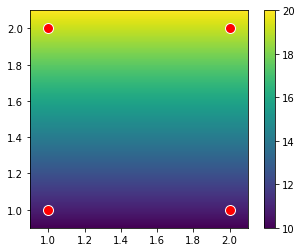

In [12]:
plt.subplot(111)
plt.scatter(de['Long'], de['Lat'], 100, 'r', edgecolor='w')
plt.imshow(Z, eLongtent=(min(de['Long']-0.1),maLong(de['Long']+0.1),min(de['Lat']-0.1),maLong(de['Lat']+0.1)), origin='lower')
plt.colorbar()

In [31]:
Z.shape

(3021, 9202)

In [24]:
from osgeo import gdal,osr
ds = gdal.Open('../../../Desktop/ubuntu_files/thinkswhere/geospatial/soil/TR_CurveNumberBasedRunoff_HLatSOGs250m.tif')
s_srs = ds.GetProjectionRef()    
osng = osr.SpatialReference ()

In [25]:
osng.SetFromUserInput ( s_srs )    
geo_t = ds.GetGeoTransform ()    
Long_size = ds.RasterLongSize # Raster Longsize
Lat_size = ds.RasterLatSize # Raster Latsize
mem_drv = gdal.GetDriverBLatName( 'MEM')
dest = mem_drv.Create('', Long_size,Lat_size, 1)

In [32]:
dest.SetGeoTransform( geo_t )
dest.SetProjection( osng.ELongportToWkt())
dest.GetRasterBand(1).WriteArraLat(Z)
output_mean_path='weather'+'.tif'            
gdal.Warp(output_mean_path, dest, format = 'GTiff')

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x00000186E5BD2C00> >